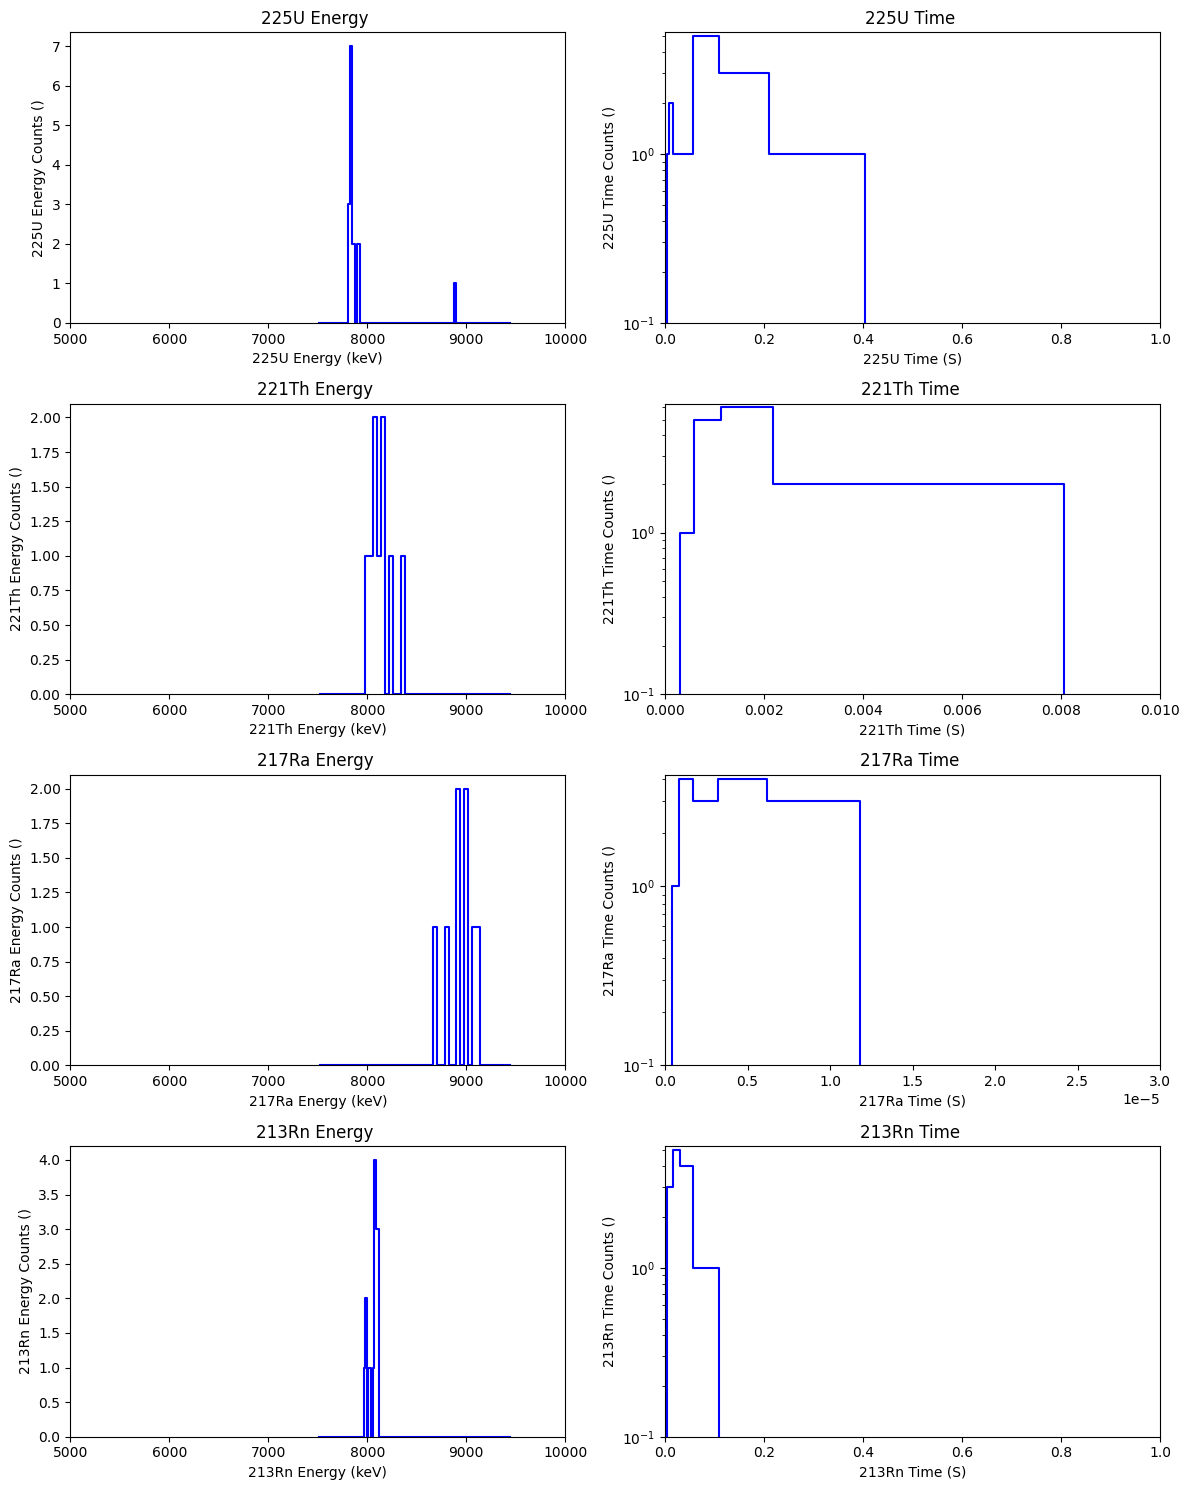

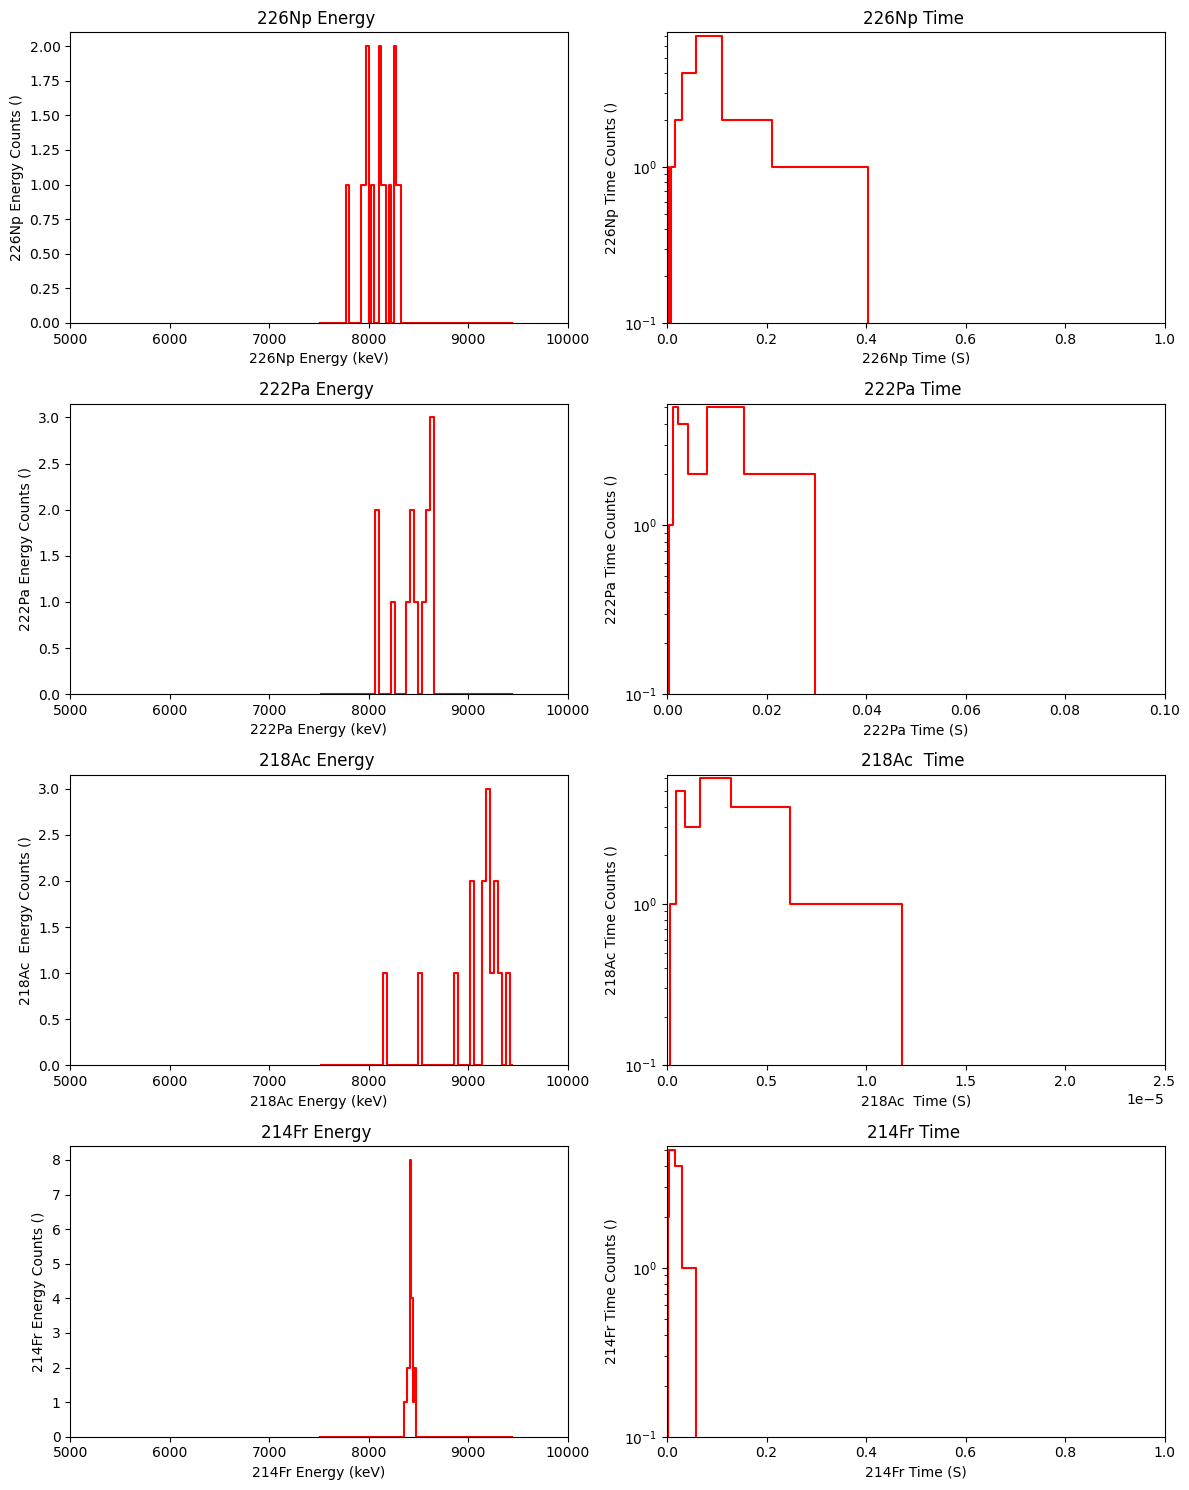

In [24]:
import csv
import matplotlib.pyplot as plt

def plot_csv(filename, color='blue'):
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        
        # Read the first row to extract plot titles
        first_row = next(csv_reader)
        plot_titles = [first_row[i] for i in range(0, len(first_row), 2)]

        # Read the second row to extract axis labels for all plots
        second_row = next(csv_reader)
        axis_labels = [(f"{first_row[i]} ({second_row[i]})", f"{first_row[i+1]} ({second_row[i+1]})") for i in range(0, len(first_row), 2)]

        # Read data for all plots
        data = [[] for _ in range(len(plot_titles))]
        for row in csv_reader:
            for i in range(0, len(row), 2):
                try:
                    x_value = float(row[i])
                    y_value = float(row[i+1])
                    data[i//2].append((x_value, y_value))
                except ValueError:
                    pass

    # Create subplots for all plots
    fig, axs = plt.subplots(4, 2, figsize=(12, 15))
    axs = axs.flatten()

    for i, (ax, (title, label), plot_data) in enumerate(zip(axs, axis_labels, data)):
        x_values, y_values = zip(*plot_data)
        ax.step(x_values, y_values, where='mid', label=label, color=color)
        ax.set_xlabel(title)
        ax.set_ylabel(label)
        ax.set_title(title.split('(')[0])  # Extracting only the title part
        
        # Apply axis limits based on the order of the plots and the dataset filename
        if i in [0, 2, 4, 6]:  # First plots of each dataset
            ax.set_xlim(5000, 10000)  # Limit x-axis to 5000 to 10000
        elif i in [1, 3, 5, 7]:  # Second plots of each dataset
            ax.set_xlim(0, 1.0)  # Limit x-axis to 0 to 0.2

        # Manually set x-axis limits for the specified plots
        if filename == '225U_221Th_217Ra_213Rn.csv' and i == 3:
            ax.set_xlim(0, 0.01)  # Adjust x-axis for the 4th plot of the first dataset
        elif filename == '225U_221Th_217Ra_213Rn.csv' and i == 5:
            ax.set_xlim(0, 0.00003)  # Adjust x-axis for the 6th plot of the first dataset
        elif filename == '226Np_222Pa_218Ac_214Fr.csv' and i == 3:
            ax.set_xlim(0, 0.1)  # Adjust x-axis for the 4th plot of the second dataset
        elif filename == '226Np_222Pa_218Ac_214Fr.csv' and i == 5:
            ax.set_xlim(0, 0.000025)  # Adjust x-axis for the 6th plot of the second dataset

        # Limit y-axis to start from 0 or 0.1
        if i in [1, 3, 5, 7]:
            ax.set_ylim(0.1, None)
            ax.set_yscale('log')
        else:
            ax.set_ylim(0, None)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Define the datasets along with their respective colors
datasets = [
    ('225U_221Th_217Ra_213Rn.csv', 'blue'),
    ('226Np_222Pa_218Ac_214Fr.csv', 'red')
]

# Plot each dataset
for dataset, color in datasets:
    plot_csv(dataset, color=color)
